In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files
from keras.layers.experimental.preprocessing import Normalization

In [ ]:
df = pd.read_excel("dataset_real.xlsx")
df

,Tavg,RH_avg,RR,ss,soil_type,plant_type
0,28.62,60.18,11.73,5.86,3,6
1,28.62,60.18,11.73,5.86,5,6
2,28.62,60.18,11.73,5.86,1,6
3,28.62,60.18,11.73,5.86,4,6
4,28.62,60.18,11.73,5.86,2,6
...,...,...,...,...,...,...
1560,25.30,100.00,35.00,0.80,3,2
1561,25.30,100.00,35.00,0.80,5,2
1562,25.30,100.00,35.00,0.80,1,2
1563,25.30,100.00,35.00,0.80,4,2


In [ ]:
X = df.iloc[:, 0:5].values
y = df.iloc[:, 5].values.reshape(-1, 1)

In [ ]:
# One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
y

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
normalizer = Normalization(input_shape=(5,))
normalizer.adapt(X_train)

In [ ]:
X_train

array([[22.6 , 91.  ,  5.  ,  5.5 ,  3.  ],
       [29.5 , 82.  , 12.2 ,  0.6 ,  3.  ],
       [25.8 , 84.  ,  0.  ,  7.1 ,  1.  ],
       ...,
       [23.15, 83.85,  7.37,  7.28,  3.  ],
       [27.6 , 93.  ,  1.4 ,  0.  ,  2.  ],
       [28.6 , 87.  ,  5.3 ,  4.  ,  5.  ]])

In [ ]:
X_test

array([[27.2 , 81.  ,  0.  ,  6.5 ,  1.  ],
       [30.  , 77.  , 89.1 ,  5.7 ,  5.  ],
       [23.2 , 92.  , 68.7 ,  5.6 ,  1.  ],
       ...,
       [28.4 , 86.  ,  8.3 ,  5.2 ,  4.  ],
       [29.4 , 81.  ,  0.5 ,  8.6 ,  4.  ],
       [22.54, 64.58, 10.53,  6.17,  4.  ]])

In [ ]:
model = Sequential(name="ANN_Model_for_Crop_Recommendation")
model.add(normalizer)
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=y_train.shape[1], activation='softmax'))


In [ ]:
model.summary()

Model: "ANN_Model_for_Crop_Recommendation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 5)                 11        
 on)                                                             
                                                                 
 dense_6 (Dense)             (None, 32)                192       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 6)                 102       
                                                                 
Total params: 833 (3.26 KB)
Trainable params: 822 (3.21 KB)
Non-trainable params: 11 (48.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9968 - val_loss: 0.0184 - val_accuracy: 0.9904
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9960 - val_loss: 0.0200 - val_accuracy: 0.9904
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.0197 - val_accuracy: 0.9904
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9968 - val_loss: 0.0189 - val_accuracy: 0.9936
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9968 - val_loss: 0.0170 - val_accuracy: 0.9936
Epoch 6/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.9976 - val_loss: 0.0181 - val_accuracy: 0.9936
Epoch 7/100
79/79 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9992 - val_loss: 0.0229 - val_accuracy: 0.9840
Epoch 8/100
7

In [ ]:
#evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

10/10 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9936
Test Accuracy: 99.36%


In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

10/10 [==============================] - 0s 2ms/step


In [ ]:
# Classification Report
print(classification_report(y_test_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        97
           2       0.99      0.99      0.99        91
           3       0.95      0.95      0.95        22
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00         7

    accuracy                           0.99       313
   macro avg       0.99      0.99      0.99       313
weighted avg       0.99      0.99      0.99       313



In [ ]:
# Predict new data
new_data = np.array([[25, 76, 19, 6, 2]])
new_data

array([[25, 76, 19,  6,  2]])

In [ ]:
y_pred_new = model.predict(new_data)
y_pred_new

1/1 [==============================] - 0s 18ms/step


array([[8.5181101e-16, 4.0355042e-04, 9.1281807e-01, 8.6778387e-02,
        1.0230172e-16, 7.0790391e-19]], dtype=float32)

In [ ]:
y_pred_label_new = encoder.inverse_transform(y_pred_new)
y_pred_label_new

array([[3]])

In [ ]:
print(f"Data baru diprediksi sebagai kelas: {y_pred_label_new[0][0]}")

Data baru diprediksi sebagai kelas: 3


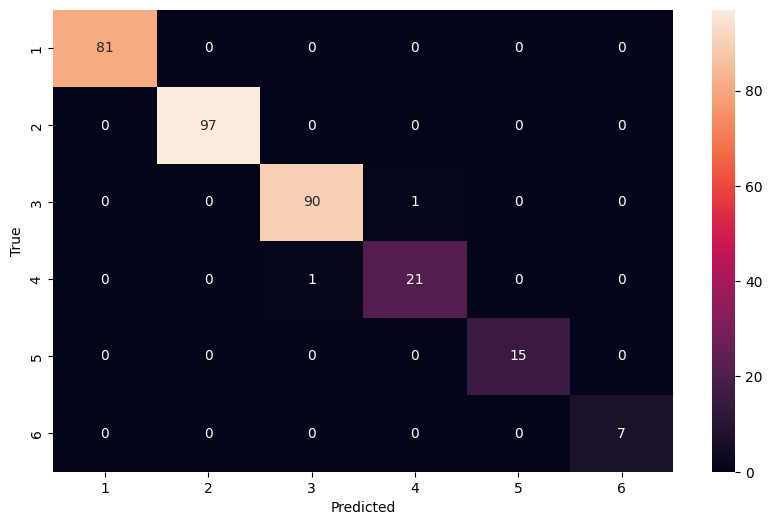

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


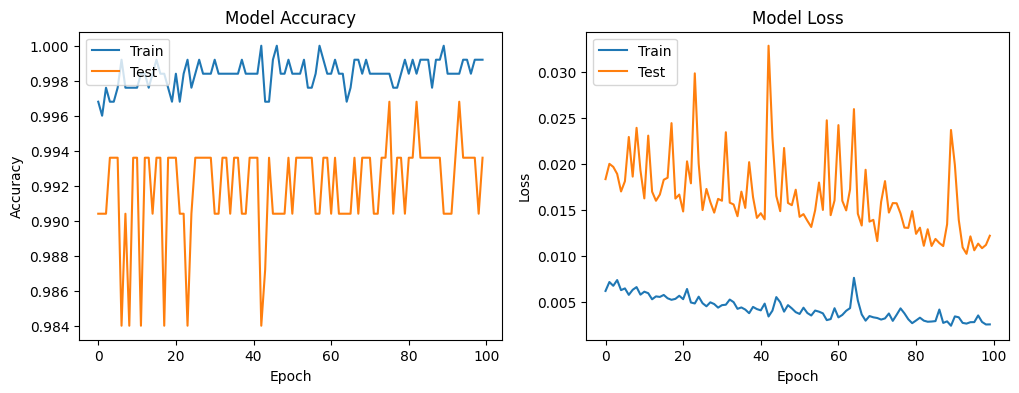

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [ ]:
file_h5 = 'ANN_MODEL.h5'
model.save(file_h5)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Install TensorFlow Lite Support Library
!pip install tflite-support

In [ ]:
# Mengonversi model Keras ke TensorFlow Lite
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
# Menyimpan model TFLite ke file
tflite_model_path = "ANN_MODEL.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

In [ ]:
# Unduh model dengan metadata ke lokal
from google.colab import files
files.download(tflite_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>